In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [36]:
data = pd.read_csv("Video Games.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4258 non-null   int64  
 1   platform     4258 non-null   object 
 2   year         4258 non-null   int64  
 3   genre        4258 non-null   object 
 4   publisher    4258 non-null   object 
 5   na_sales     4258 non-null   float64
 6   eu_sales     4258 non-null   float64
 7   other_sales  4258 non-null   float64
 8   jp_sales     4258 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 299.5+ KB


In [37]:
data.head()

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12


In [38]:
data.isnull().sum()

id             0
platform       0
year           0
genre          0
publisher      0
na_sales       0
eu_sales       0
other_sales    0
jp_sales       0
dtype: int64

In [39]:
data['genre'].value_counts()

Action          777
Role-Playing    710
Adventure       541
Sports          427
Misc            378
Fighting        342
Shooter         249
Platform        196
Strategy        186
Simulation      181
Racing          160
Puzzle          111
Name: genre, dtype: int64

In [40]:
sale_pbl = data[['publisher', 'jp_sales']]
sale_pbl = sale_pbl.groupby('publisher')['jp_sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Namco Bandai Games'),
  Text(2, 0, 'Konami Digital Entertainment'),
  Text(3, 0, 'Sega'),
  Text(4, 0, 'Sony Computer Entertainment'),
  Text(5, 0, 'Capcom'),
  Text(6, 0, 'Tecmo Koei'),
  Text(7, 0, 'Electronic Arts'),
  Text(8, 0, 'Square Enix'),
  Text(9, 0, 'Idea Factory'),
  Text(10, 0, 'Ubisoft'),
  Text(11, 0, 'Nippon Ichi Software'),
  Text(12, 0, 'Activision'),
  Text(13, 0, 'Banpresto'),
  Text(14, 0, 'Hudson Soft'),
  Text(15, 0, 'D3Publisher'),
  Text(16, 0, 'SquareSoft'),
  Text(17, 0, 'Microsoft Game Studios'),
  Text(18, 0, 'Take-Two Interactive'),
  Text(19, 0, '5pb')])

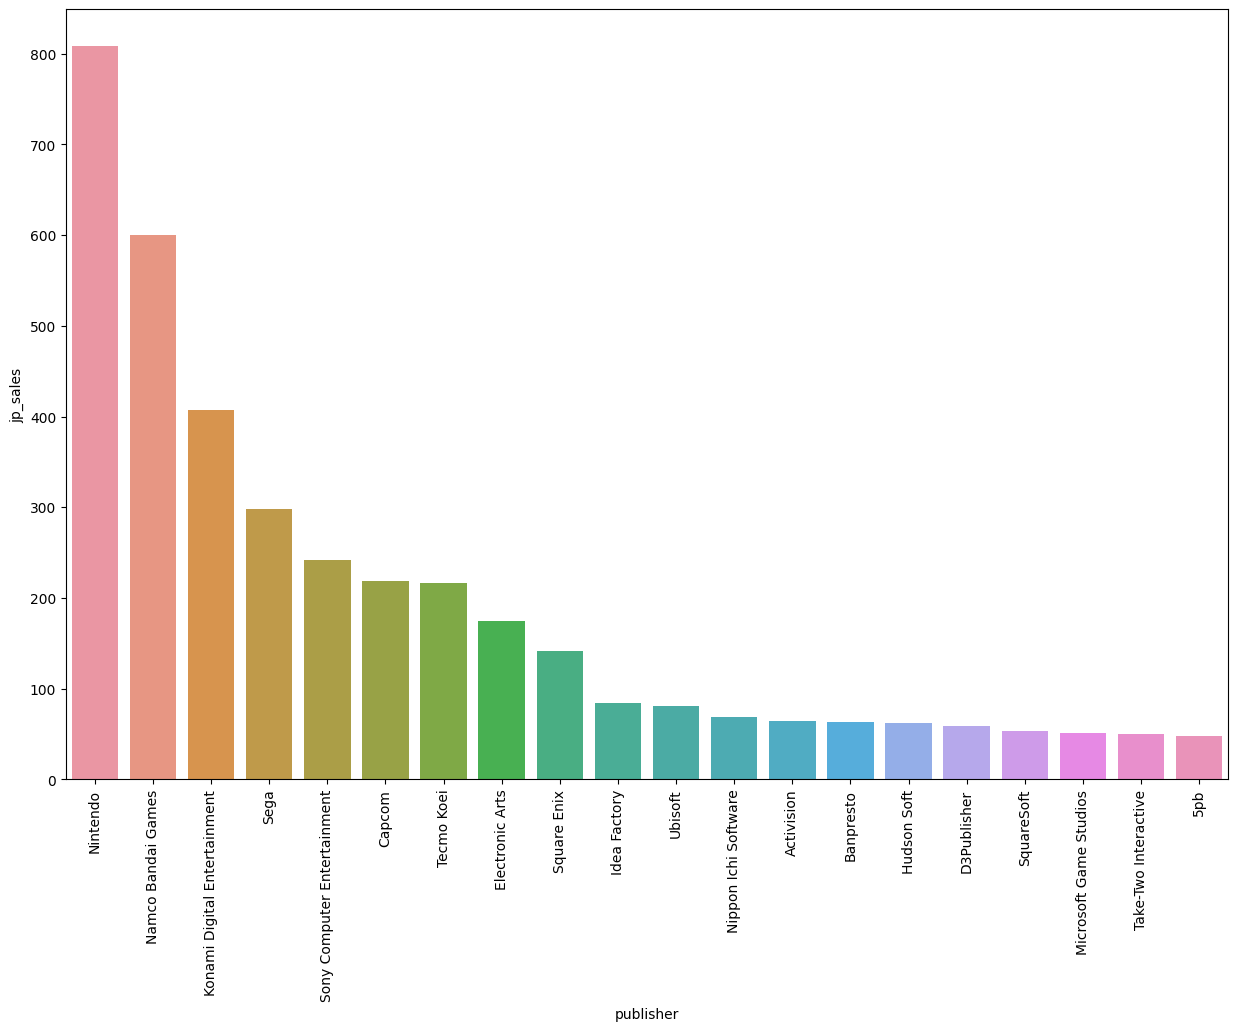

In [41]:
plt.figure(figsize=(15, 10))
sns.barplot(x='publisher', y='jp_sales', data=sale_pbl)
plt.xticks(rotation=90)

In [42]:
def create_dictionary(column):
    unique_values = set(column)
    value_to_index = {value: index for index, value in enumerate(unique_values)}
    return value_to_index

In [43]:
for column in ["platform", "genre", "publisher"]:
    value_to_index = create_dictionary(data[column])
    data[column] = data[column].apply(lambda x: value_to_index[x])

In [121]:
data.head()

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,19,2012,4,165,0.38,0.52,0.25,1.01
1,3865,22,1996,10,163,0.00,0.00,0.00,1.31
2,4617,20,2009,8,116,0.09,0.00,0.01,1.04
3,3675,10,2007,5,116,0.00,0.00,0.00,1.08
4,1612,19,2016,9,189,0.00,0.00,0.00,1.12


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4258 non-null   int64  
 1   platform     4258 non-null   int64  
 2   year         4258 non-null   int64  
 3   genre        4258 non-null   int64  
 4   publisher    4258 non-null   int64  
 5   na_sales     4258 non-null   float64
 6   eu_sales     4258 non-null   float64
 7   other_sales  4258 non-null   float64
 8   jp_sales     4258 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 299.5 KB


In [63]:
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
5     na_sales    0.224384
6     eu_sales    0.200419
2         year    0.131936
4    publisher    0.116493
1     platform    0.104116
0           id    0.083102
7  other_sales    0.070762
3        genre    0.068788


In [173]:
X = data.drop(['jp_sales'], axis=1) 
y = data['jp_sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = model.score(X_test, y_test)
print(score)

0.6789687298815628


In [174]:
from xgboost import XGBRegressor
model = XGBRegressor()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)

0.6383697940826474


In [158]:
X = data.drop('jp_sales', axis=1)  
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = data['jp_sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = model.score(X_test, y_test)
print(score)

Среднеквадратичная ошибка: 0.1814493253715634
0.39964744394217766


In [170]:
X = data.drop('jp_sales', axis=1) 
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = data['jp_sales']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = model.score(X_test, y_test)
print(score)

0.7028092530222613


In [70]:
X = X.values
X_transpose = np.transpose(X)

X_transpose_X = np.dot(X_transpose, X)

determinant = np.linalg.det(X_transpose_X)

print("Определитель матрицы (X^T * X):", determinant)

Определитель матрицы (X^T * X): 3.0190207711782497e+46


In [181]:
X = data.drop('jp_sales', axis=1)
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
X = np.hstack((np.ones((X.shape[0], 1)), X))
Y = data['jp_sales']

class MultipleRegression:
    def __init__(self, learning_rate=0.01, iterations=3000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None
        self.errors = []

    def fit(self, X, Y):
        self.coefficients = np.zeros(X.shape[1])
        for _ in range(self.iterations):
            predictions = X @ self.coefficients
            errors = predictions - Y
            gradient = 2 * X.T @ errors / len(Y)
            self.coefficients -= self.learning_rate * gradient

            self.errors.append(np.mean(errors**2))

    def predict(self, X):
        return X @ self.coefficients

model = MultipleRegression(learning_rate=0.01, iterations=3000)
model.fit(X, Y)


predictions = model.predict(X)

mae = np.mean(np.abs(predictions - Y))
mape = np.mean(np.abs((predictions - Y) / Y)) * 100

print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

MAE: 0.2022850058172538
MAPE: 13.620889272372017%


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = MultipleRegression(learning_rate=0.01, iterations=10000)
model.fit(X_train, Y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

mse_train = mean_squared_error(Y_train, predictions_train)
mse_test = mean_squared_error(Y_test, predictions_test)

print(f'MSE на обучающей выборке: {mse_train}')
print(f'MSE на тестовой выборке: {mse_test}')

MSE на обучающей выборке: 0.1829017369525641
MSE на тестовой выборке: 0.2378870582387962


In [161]:
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000, batch_size=1):
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = batch_size
        self.coefficients = None

    def fit(self, X, Y):
        self.coefficients = np.zeros(X.shape[1])
        m = len(Y)

        for _ in range(self.iterations):
            indices = np.random.choice(m, size=self.batch_size, replace=False)
            X_batch, Y_batch = X[indices], Y[indices]

            predictions = X_batch @ self.coefficients
            errors = predictions - Y_batch
            gradient = 2 * X_batch.T @ errors / len(Y_batch)

            self.coefficients -= self.learning_rate * gradient

    def predict(self, X):
        return X @ self.coefficients

batch_sizes = [1, 16, 64, 128, 256]

for batch_size in batch_sizes:
    sgd_model = StochasticGradientDescent(learning_rate=0.01, iterations=1000, batch_size=batch_size)
    sgd_model.fit(X_train, Y_train)

    predictions_train_sgd = sgd_model.predict(X_train)
    predictions_test_sgd = sgd_model.predict(X_test)

    mse_train_sgd = mean_squared_error(Y_train, predictions_train_sgd)
    mse_test_sgd = mean_squared_error(Y_test, predictions_test_sgd)

    print(f'Обучающая (batch_size={batch_size}): {mse_train_sgd}')
    print(f'Тестовая (batch_size={batch_size}): {mse_test_sgd}')
    print()

Обучающая (batch_size=1): 0.23465005045200257
Тестовая (batch_size=1): 0.3031265252818447

Обучающая (batch_size=16): 0.2333115506317966
Тестовая (batch_size=16): 0.30385466644108017

Обучающая (batch_size=64): 0.23269797401264317
Тестовая (batch_size=64): 0.30257186075061515

Обучающая (batch_size=128): 0.23330963813787353
Тестовая (batch_size=128): 0.30327331720977707

Обучающая (batch_size=256): 0.2331632800358445
Тестовая (batch_size=256): 0.3032365756019352



In [150]:
class RegularizedStochasticGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_value=0.01, rho=0.9, batch_size=1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_value = lambda_value
        self.rho = rho
        self.batch_size = batch_size
        self.coefficients = None

    def _compute_regularization_term(self, coefficients):
        l1_term = self.lambda_value * self.rho * np.sign(coefficients)
        l2_term = 2 * self.lambda_value * (1 - self.rho) * coefficients
        return l1_term + l2_term

    def fit(self, X, Y):
        n, m = X.shape
        self.coefficients = np.zeros(m)

        for _ in range(self.iterations):
            indices = np.random.choice(n, size=self.batch_size, replace=False)
            X_batch, Y_batch = X[indices], Y[indices]

            predictions = X_batch @ self.coefficients
            errors = predictions - Y_batch
            gradient = 2 * X_batch.T @ errors / len(Y_batch)

            regularization_term = self._compute_regularization_term(self.coefficients)
            gradient += regularization_term

            self.coefficients = self.coefficients - self.learning_rate * gradient

    def predict(self, X):
        return X @ self.coefficients

In [178]:
best_lambda = None
best_rho = None
best_mse_diff = float('inf')

for lambda_value in [0.01, 0.1, 0.9, 1]:
    for rho_value in [0.01, 0.1,  0.9, 1]:
        
        model = RegularizedStochasticGradientDescent(learning_rate=0.01, iterations=3000, lambda_value=lambda_value, rho=rho_value)
        model.fit(X_train, Y_train)
        
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)

        mse_train = np.mean((predictions_train - Y_train) ** 2)
        mse_test = np.mean((predictions_test - Y_test) ** 2)
        mse_diff = abs(mse_train - mse_test)

        print(f"MSE Train: {mse_train}, MSE Test: {mse_test}, MSE Difference: {mse_diff}")

        if mse_diff < best_mse_diff:
            best_mse_diff = mse_diff

print(f"Best MSE Difference: {best_mse_diff}")

MSE Train: 0.30840307683960394, MSE Test: 0.3894595894900339, MSE Difference: 0.08105651265042996
MSE Train: 0.31170222732441855, MSE Test: 0.39085744733325284, MSE Difference: 0.07915522000883429
MSE Train: 0.31633284641770093, MSE Test: 0.39639361300162246, MSE Difference: 0.08006076658392153
MSE Train: 0.31499982875744387, MSE Test: 0.3946333539110542, MSE Difference: 0.07963352515361033
MSE Train: 0.32242420090600477, MSE Test: 0.40234472667302124, MSE Difference: 0.07992052576701647
MSE Train: 0.3210040798924266, MSE Test: 0.401179692973125, MSE Difference: 0.08017561308069843
MSE Train: 0.33628189520527574, MSE Test: 0.4188275414073662, MSE Difference: 0.08254564620209048
MSE Train: 0.32945799049456703, MSE Test: 0.41375679202858123, MSE Difference: 0.0842988015340142
MSE Train: 0.5289678408025479, MSE Test: 0.6036446156101544, MSE Difference: 0.07467677480760648
MSE Train: 0.4900730285533348, MSE Test: 0.5653692585113183, MSE Difference: 0.07529622995798346
MSE Train: 0.75262962